In [77]:
#Import pandas,numpy for Dataset Manupilation and matplotlib and seaborn for Visualization and graphviz for tree visualization
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import graphviz
from sklearn import tree

In [78]:
#Import functions for Model, Dataset Splitting and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [79]:
df=pd.read_csv('Datasets/diabetes.csv') #Read the Dataset CSV File to a dataframe object

In [80]:
df.shape # To view the shape of our dataset (768 rows and 9 columns)

(768, 9)

In [81]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [82]:
df.info() #Information about the Dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [83]:
df.describe() # Further Statistical Information about the dataset

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

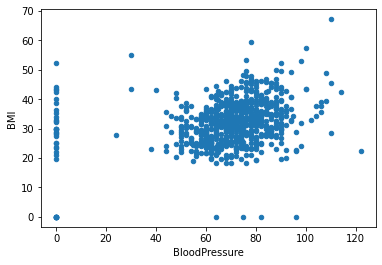

From df.describe and the plot we can see that few rows have 0 as value for some columns


In [84]:
# Display BloodPressure against BMI
df.plot(kind="scatter", x="BloodPressure", y="BMI") # Plot the data points (x-Sepal Length and y-Sepal Width)
plt.show()
print("From df.describe and the plot we can see that few rows have 0 as value for some columns")

In [85]:
# Let's replace those 0 values with the mean of column
zerocols=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for col in zerocols:
    df[col]=df[col].replace(0,df[col].mean())

In [86]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0     6.000000    148.0           72.0      35.000000   79.799479  33.6   
1     1.000000     85.0           66.0      29.000000   79.799479  26.6   
2     8.000000    183.0           64.0      20.536458   79.799479  23.3   
3     1.000000     89.0           66.0      23.000000   94.000000  28.1   
4     3.845052    137.0           40.0      35.000000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [87]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      4.400782  121.681605      72.254807      26.606479  118.660163   
std       2.984162   30.436016      12.115932       9.631241   93.080358   
min       1.000000   44.000000      24.000000       7.000000   14.000000   
25%       2.000000   99.750000      64.000000      20.536458   79.799479   
50%       3.845052  117.000000      72.000000      23.000000   79.799479   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.450805                  0.471876   33.240885    0.348958  
std      6.875374                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

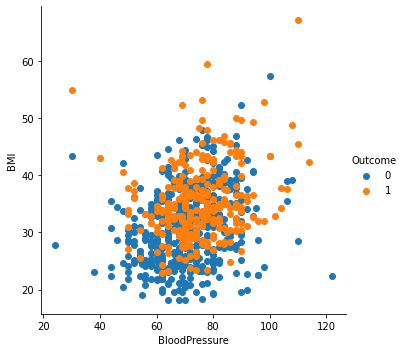

In [88]:
sns.FacetGrid(df, hue="Outcome", height=5).map(plt.scatter, "BloodPressure", "BMI").add_legend() 
plt.show()

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

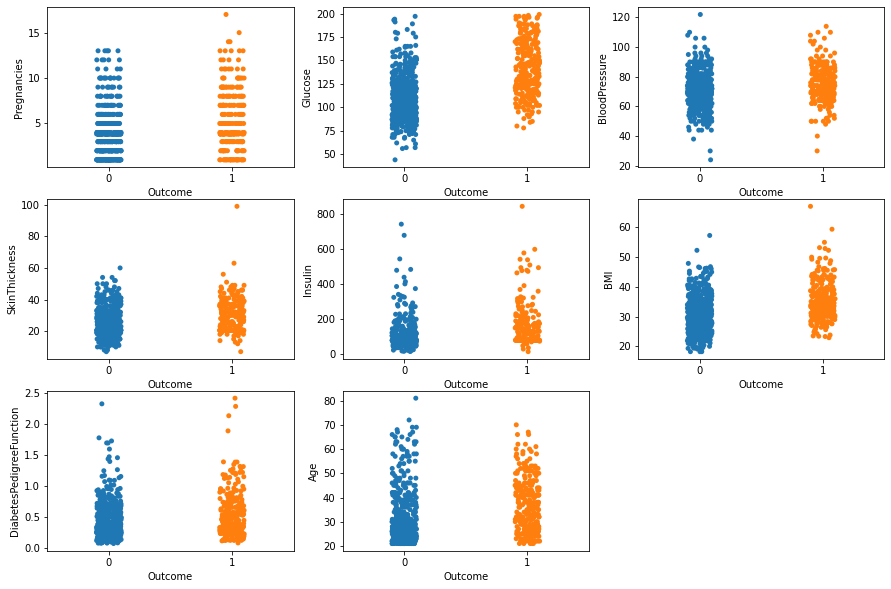

In [89]:
# Display distribution of data points of each class in each attribute
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
sns.stripplot(x = 'Outcome', y = 'Pregnancies', data = df, jitter = True)
plt.subplot(3,3,2)
sns.stripplot(x = 'Outcome', y = 'Glucose', data = df, jitter = True)
plt.subplot(3,3,3)
sns.stripplot(x = 'Outcome', y = 'BloodPressure', data = df, jitter = True)
plt.subplot(3,3,4)
sns.stripplot(x = 'Outcome', y = 'SkinThickness', data = df, jitter = True)
plt.subplot(3,3,5)
sns.stripplot(x = 'Outcome', y = 'Insulin', data = df, jitter = True)
plt.subplot(3,3,6)
sns.stripplot(x = 'Outcome', y = 'BMI', data = df, jitter = True)
plt.subplot(3,3,7)
sns.stripplot(x = 'Outcome', y = 'DiabetesPedigreeFunction', data = df, jitter = True)
plt.subplot(3,3,8)
sns.stripplot(x = 'Outcome', y = 'Age', data = df, jitter = True)

In [90]:
corr=df.corr() #Correlation Matrix

As you can see each of the attributes contribute reasonably towards the outcome


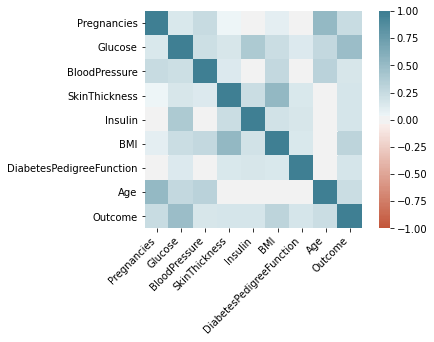

In [91]:
# Display the correlation matrix using a heatmap
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
print("As you can see each of the attributes contribute reasonably towards the outcome")

In [92]:
# Exactly –1. A perfect downhill (negative) linear relationship

# –0.70. A strong downhill (negative) linear relationship

# –0.50. A moderate downhill (negative) relationship

# –0.25. A weak downhill (negative) linear relationship

# 0. No linear relationship


# +0.25. A weak uphill (positive) linear relationship

# +0.50. A moderate uphill (positive) relationship

# +0.70. A strong uphill (positive) linear relationship

# Exactly +1. A perfect uphill (positive) linear relationship

In [93]:
X=df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].values
y=df['Outcome']

In [94]:
# Create the training and test sets using 0.2 as test size (i.e 80% of data for training rest 20% for model testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [95]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [96]:
y_pred = clf.predict(X_test)

In [97]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7792207792207793


In [98]:
# Get the confusion Matrix of the Model
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[87, 20],
       [14, 33]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

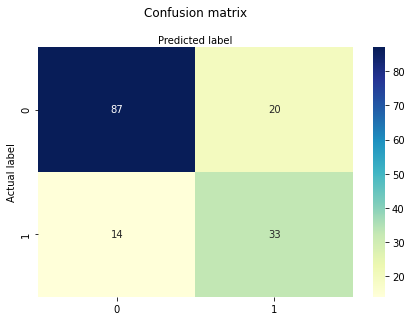

In [99]:
# Plot the Confusion Matrix as a HeatMap
class_names=[0,1] # Name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [100]:
print(metrics.classification_report(y, clf.predict(X))) # Displays a comprehensive Report of the Decision Tree Model

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       500
           1       0.93      0.95      0.94       268

    accuracy                           0.96       768
   macro avg       0.95      0.95      0.95       768
weighted avg       0.96      0.96      0.96       768



In [101]:
#Two possible ways to visualize the Decision Tree
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_1 <= 123.50
|   |--- feature_7 <= 28.50
|   |   |--- feature_5 <= 30.95
|   |   |   |--- feature_0 <= 7.00
|   |   |   |   |--- feature_6 <= 0.67
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_6 >  0.67
|   |   |   |   |   |--- feature_5 <= 23.55
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_5 >  23.55
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  7.00
|   |   |   |   |--- class: 1
|   |   |--- feature_5 >  30.95
|   |   |   |--- feature_2 <= 53.00
|   |   |   |   |--- feature_6 <= 0.51
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_6 >  0.51
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  53.00
|   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |--- feature_5 <= 45.35
|   |   |   |   |   |   |--- feature_0 <= 2.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_0 >  2.50
|   |   |   |   |   |   |   |--- feature_5 <= 31.80
|   |   |   |   | 

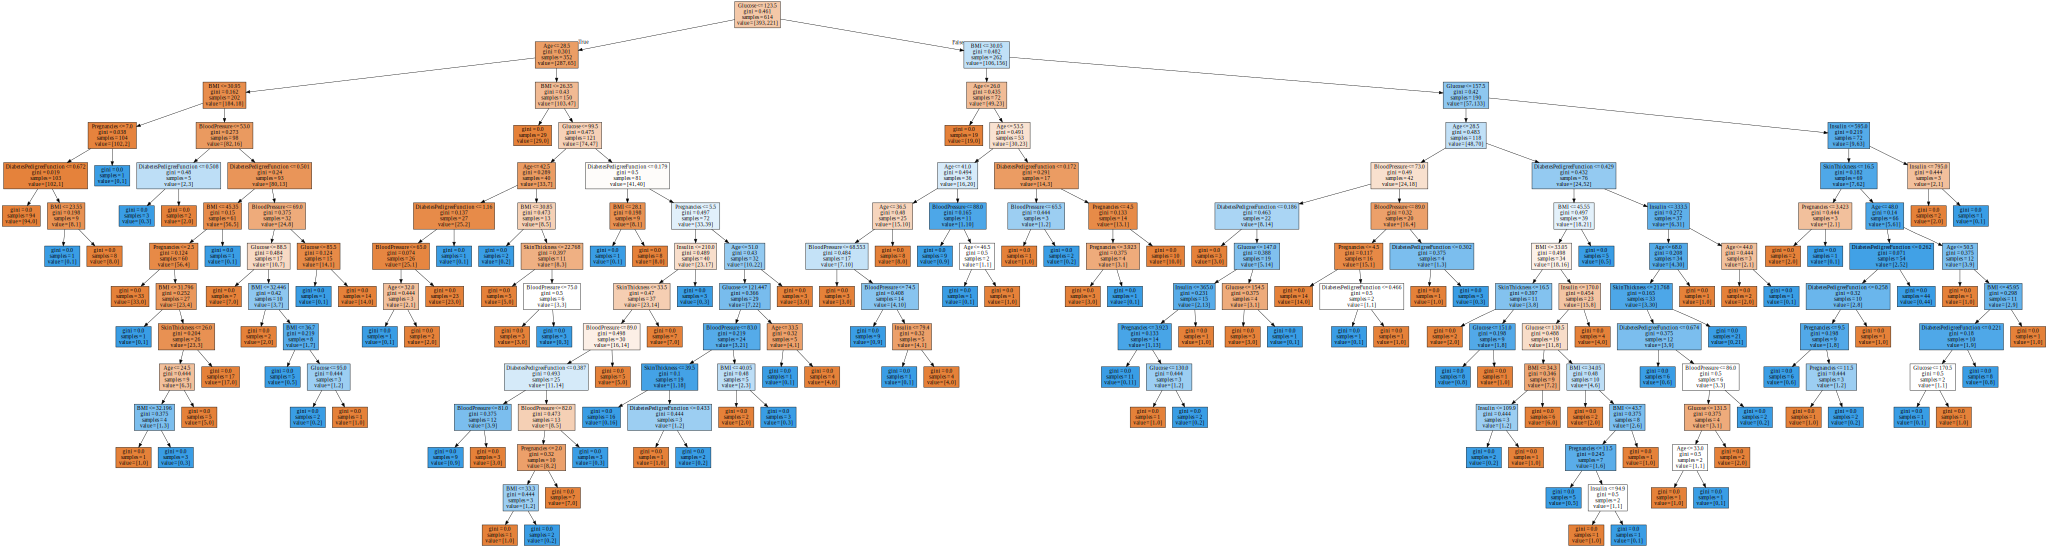

In [104]:
#Display the decision tree as a graph
features=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
labels=['Outcome']
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=features,  
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph